<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DataDay_13_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Preparation***

In [2]:

import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [3]:
data.fillna(data.mean(), inplace=True)

if data.isnull().values.any():
    print("Missing values still exist in the dataset.")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [4]:

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())
print(data.describe())

               value
date                
1991-07-01  0.026520
1991-08-01  0.013645
1991-09-01  0.016301
1991-10-01  0.029663
1991-11-01  0.027982
            value
count  204.000000
mean     0.293470
std      0.221855
min      0.000000
25%      0.112830
50%      0.242258
75%      0.427378
max      1.000000


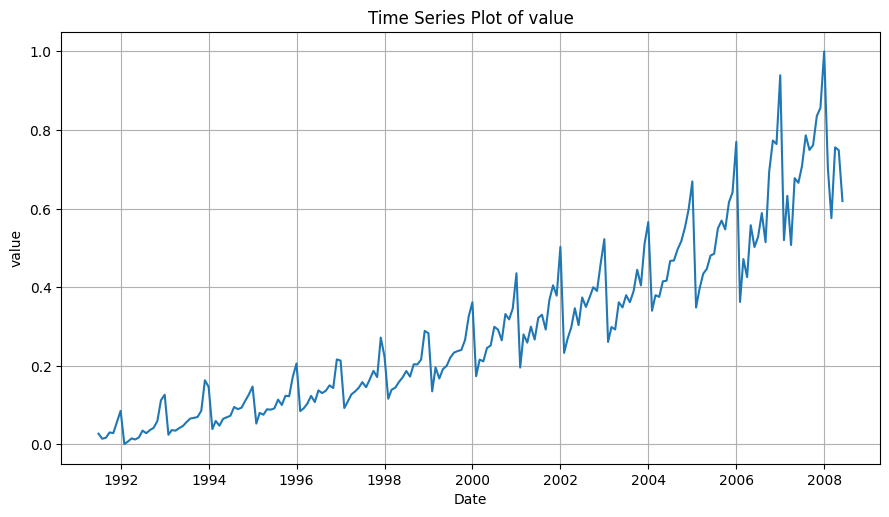

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 6 * len(data.columns)))
fig.tight_layout(pad=5.0)

if len(data.columns) == 1:
    ax = axes
    ax.plot(data.index, data[data.columns[0]])
    ax.set_title(f"Time Series Plot of {data.columns[0]}")
    ax.set_xlabel("Date")
    ax.set_ylabel(data.columns[0])
    ax.grid(True)
else:
    for i, col in enumerate(data.columns):
        ax = axes[i]
        ax.plot(data.index, data[col])
        ax.set_title(f"Time Series Plot of {col}")
        ax.set_xlabel("Date")
        ax.set_ylabel(col)
        ax.grid(True)

plt.show()

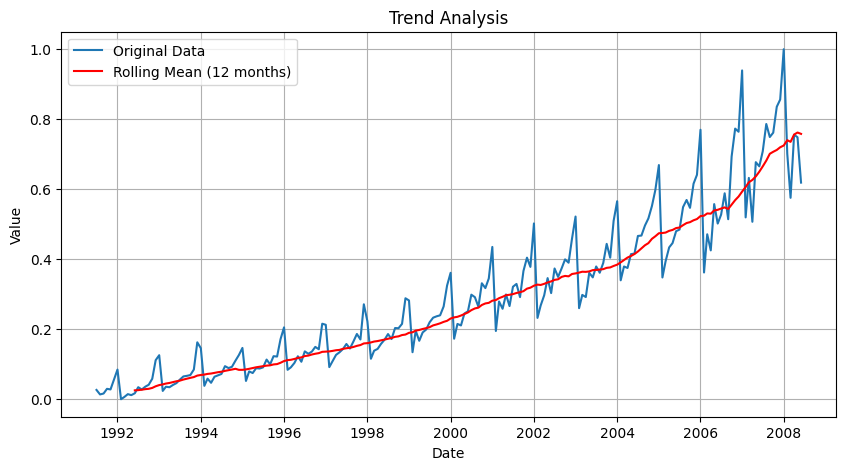

In [11]:
rolling_mean = data['value'].rolling(window=12).mean()
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.plot(data.index, data['value'], label='Original Data')
axes.plot(rolling_mean.index, rolling_mean, label='Rolling Mean (12 months)', color='red')
axes.set_title("Trend Analysis")
axes.set_xlabel('Date')
axes.set_ylabel('Value')
axes.legend()
axes.grid(True)

plt.show()

# ***Time Series Decomposition***

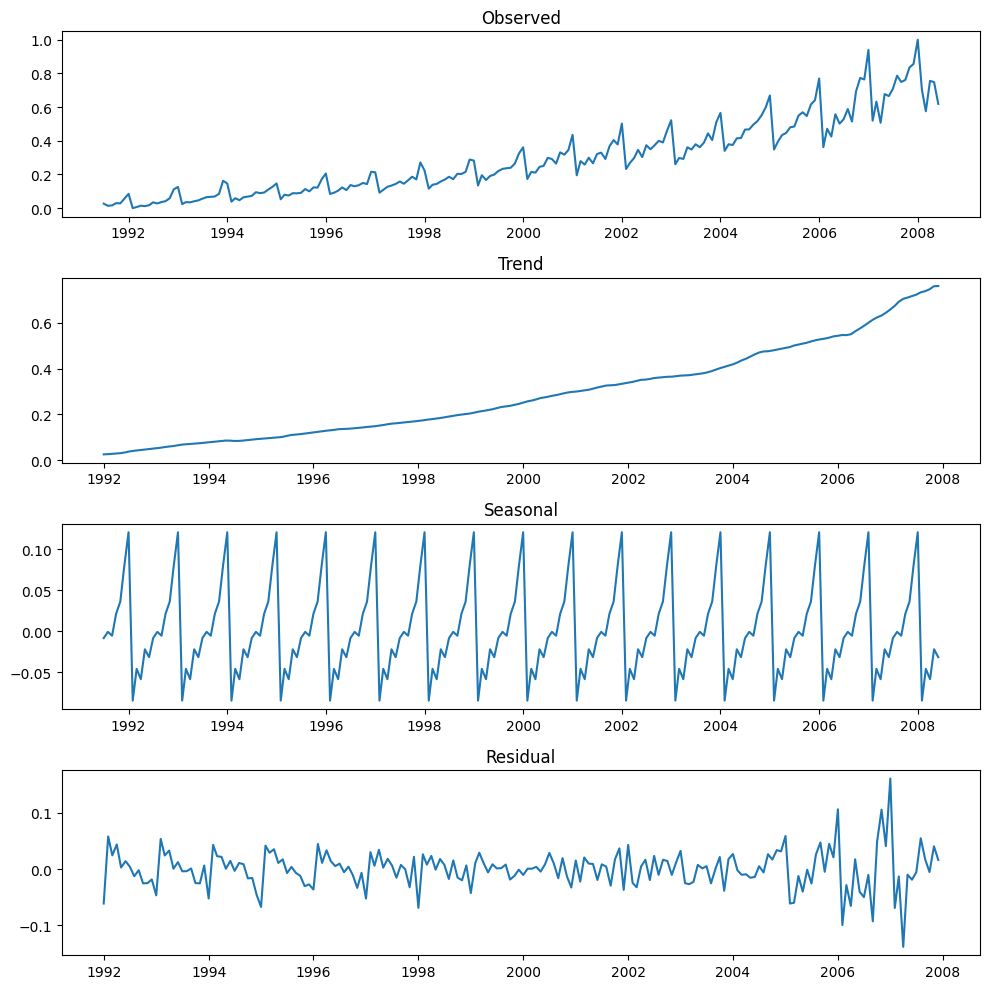

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['value'], model='additive')


fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonal')
axes[3].plot(result.resid)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

Observed: Raw data with underlying patterns.

Trend: Long-term upward trajectory.

Seasonal: Regular rhythmic fluctuations.

Residual: Random noise and unexplained variation.

# ***Trend Estimation***

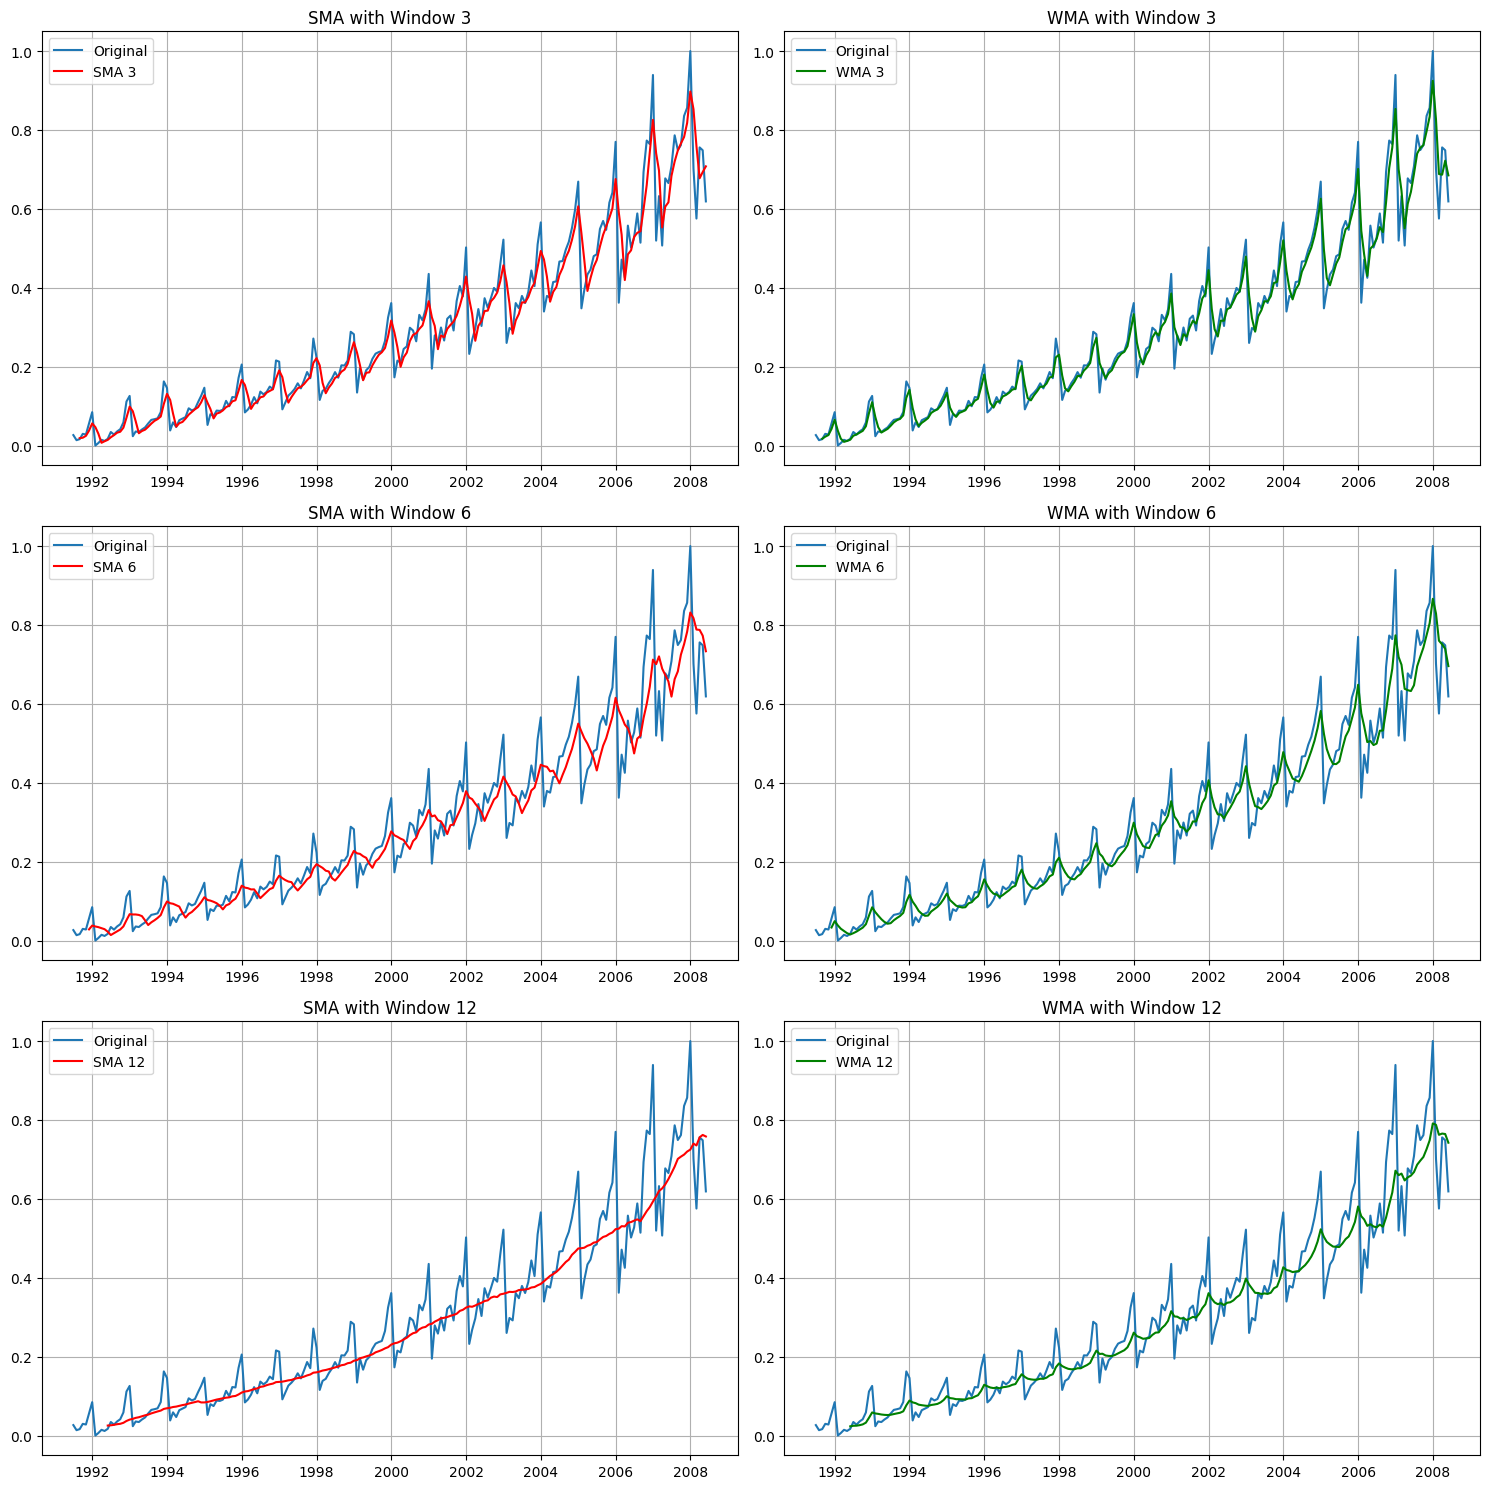

In [16]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


def sma(data, window):
    return data['value'].rolling(window=window).mean()

def wma(data, window):
    weights = np.arange(1, window + 1)
    return data['value'].rolling(window=window).apply(lambda x: np.sum(weights * x) / np.sum(weights), raw=True)

window_sizes = [3, 6, 12]

fig, axes = plt.subplots(len(window_sizes), 2, figsize=(15, 5 * len(window_sizes)))

for i, window in enumerate(window_sizes):
    data['SMA_' + str(window)] = sma(data, window)
    axes[i, 0].plot(data.index, data['value'], label='Original')
    axes[i, 0].plot(data.index, data['SMA_' + str(window)], label=f'SMA {window}', color='red')
    axes[i, 0].set_title(f'SMA with Window {window}')
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    data['WMA_' + str(window)] = wma(data, window)
    axes[i, 1].plot(data.index, data['value'], label='Original')
    axes[i, 1].plot(data.index, data['WMA_' + str(window)], label=f'WMA {window}', color='green')
    axes[i, 1].set_title(f'WMA with Window {window}')
    axes[i, 1].legend()
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()

# ***Exponential Smoothing***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-18-4b1861fd98ea>:11: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = ExponentialSmoothing(train_data['value'], trend='add').fit(smoothing_level=0.2, smoothing_slope=0.1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

SES RMSE: 0.17697114170238842
Holt's Linear Trend RMSE: 0.22966464558738622
Holt-Winters RMSE: 0.11325392855269047


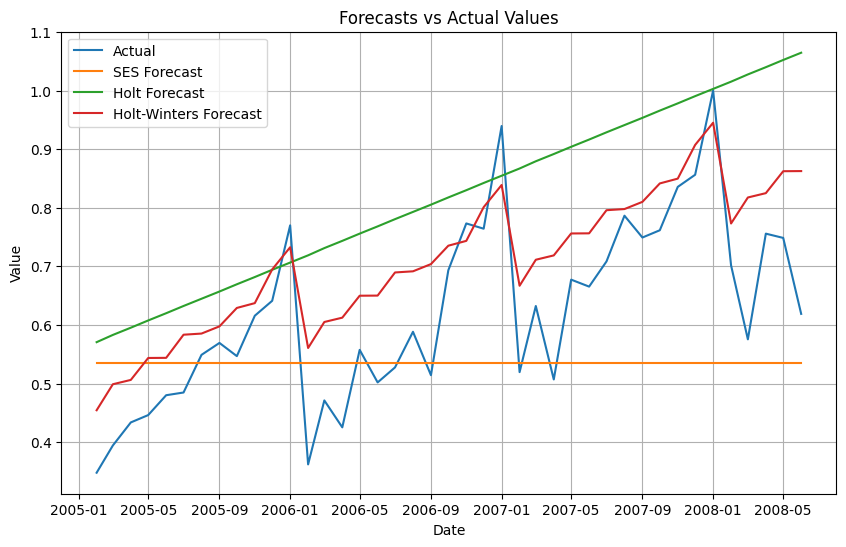

In [18]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]

ses_model = SimpleExpSmoothing(train_data['value']).fit(smoothing_level=0.2)
ses_forecast = ses_model.forecast(len(test_data))
ses_rmse = np.sqrt(mean_squared_error(test_data['value'], ses_forecast))

holt_model = ExponentialSmoothing(train_data['value'], trend='add').fit(smoothing_level=0.2, smoothing_slope=0.1)
holt_forecast = holt_model.forecast(len(test_data))
holt_rmse = np.sqrt(mean_squared_error(test_data['value'], holt_forecast))


hw_model = ExponentialSmoothing(train_data['value'], trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal=0.1)
hw_forecast = hw_model.forecast(len(test_data))
hw_rmse = np.sqrt(mean_squared_error(test_data['value'], hw_forecast))


print(f"SES RMSE: {ses_rmse}")
print(f"Holt's Linear Trend RMSE: {holt_rmse}")
print(f"Holt-Winters RMSE: {hw_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['value'], label='Actual')
plt.plot(test_data.index, ses_forecast, label='SES Forecast')
plt.plot(test_data.index, holt_forecast, label='Holt Forecast')
plt.plot(test_data.index, hw_forecast, label='Holt-Winters Forecast')

plt.legend()
plt.title('Forecasts vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

The graph shows how well three forecasting methods (SES, Holt, Holt-Winters) predict actual values. SES is flat, Holt shows a trend, and Holt-Winters tracks changes best

# ***Forecasting with AR, ARIMA, SARIMA***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

AR RMSE: 0.1805305130453245
ARIMA RMSE: 0.15570508157680818
SARIMA RMSE: 0.0745487373640879


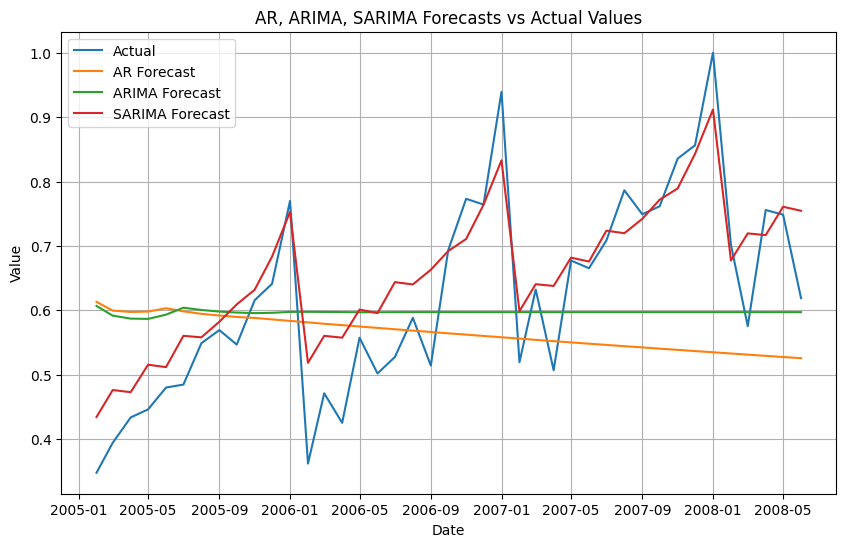

In [19]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# AR Model
ar_model = ARIMA(train_data['value'], order=(5, 0, 0))
ar_model_fit = ar_model.fit()
ar_predictions = ar_model_fit.predict(start=len(train_data), end=len(data)-1)
ar_rmse = np.sqrt(mean_squared_error(test_data['value'], ar_predictions))

# ARIMA Model
arima_model = ARIMA(train_data['value'], order=(5,1,0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(data)-1)
arima_rmse = np.sqrt(mean_squared_error(test_data['value'], arima_predictions))


# SARIMA Model
sarima_model = SARIMAX(train_data['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(data)-1)
sarima_rmse = np.sqrt(mean_squared_error(test_data['value'], sarima_predictions))

print(f"AR RMSE: {ar_rmse}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")

# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['value'], label='Actual')
plt.plot(test_data.index, ar_predictions, label='AR Forecast')
plt.plot(test_data.index, arima_predictions, label='ARIMA Forecast')
plt.plot(test_data.index, sarima_predictions, label='SARIMA Forecast')
plt.legend()
plt.title('AR, ARIMA, SARIMA Forecasts vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

The graph illustrates the performance of three forecasting models (AR, ARIMA, and SARIMA) compared to actual values. The AR model, with its flat forecast, struggles to capture the dynamic nature of the data. The ARIMA model, while showing some responsiveness to trends, misses significant fluctuations. In contrast, the SARIMA model demonstrates the best fit, accurately tracking both the overall trend and the sharp changes in the actual values. This suggests that SARIMA, with its ability to handle both trend and seasonality, is likely the most suitable model for forecasting this particular time series.










# ***Evaluation***

In [20]:

results_df = pd.DataFrame({
    'Method': ['SES', 'Holt', 'Holt-Winters', 'AR', 'ARIMA', 'SARIMA'],
    'RMSE': [ses_rmse, holt_rmse, hw_rmse, ar_rmse, arima_rmse, sarima_rmse]
})

print(results_df)

best_method = results_df.loc[results_df['RMSE'].idxmin()]

print("\nBest Performing Method:")
print(best_method)

print("\nSummary:")
print(f"The {best_method['Method']} method achieved the lowest RMSE ({best_method['RMSE']:.4f}), indicating the best fit to the test data among the compared models.")
print("This suggests that it effectively captured the underlying patterns in the time series, including trend and seasonality (if applicable), leading to more accurate predictions.")

         Method      RMSE
0           SES  0.176971
1          Holt  0.229665
2  Holt-Winters  0.113254
3            AR  0.180531
4         ARIMA  0.155705
5        SARIMA  0.074549

Best Performing Method:
Method      SARIMA
RMSE      0.074549
Name: 5, dtype: object

Summary:
The SARIMA method achieved the lowest RMSE (0.0745), indicating the best fit to the test data among the compared models.
This suggests that it effectively captured the underlying patterns in the time series, including trend and seasonality (if applicable), leading to more accurate predictions.
